# **Waze Project -- EDA**
**Go Beyond the Numbers: Translate Data into Insights**

**Background**

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 

Who are the users most likely to churn?

Why do users churn? 

When do users churn? 
For example, if Waze can identify a segment of users who are at high risk of churning, Waze can proactively engage these users with special offers to try and retain them. Otherwise, Waze may lose these users without knowing why. 

# **Exploratory data analysis (EDA)**

<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on Waze dataset and create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

**The goal** is to explore data and identify story that the data tells.
<br/>


*This EDA has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>

### **Step 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.
In addition, seaborn and plotly.express might be helpful for visualization.



In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read in the data and store it as a dataframe object called df.

In [252]:
# Load the dataset into a dataframe called df
df = pd.read_csv('waze_dataset.csv')

### **Step 2. Data exploration and cleaning**



#### **Data overview and summary statistics**

It's always helpful to overview dataset at the beginning of a project.

In [253]:
# Overview data
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [254]:
# Explore data sizes
df.shape

(14999, 13)

In [255]:
# Explore data type
df.dtypes

ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

In [256]:
# overall observation on data
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [257]:
# Getting data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


- There are 13 columns in the dataset. There are 14999 unique users on each row. 
- Data types are integer, float and object. Only two columns are categorical data. 
- From the observation, the data types are reasonable here. However, float values are not rounded so might need to round if calculation is required.
- categorial variables may need to transform into numerical data if machine learning model needed. 
- There is no missing values in numerical variables. However, there are 700 rows of missing values under the 'label' variable.

In [258]:
# Observe the Missing data
df_missing = df[df['label'].isnull()]
df_missing.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


By observing missing data, there is no obvious pattern that we can identified for the missing data. However, since we are interested in user churn, this label column is essential for us so I don't suggest to do a complete-case analysis by removing the rows with missing values. I believe we need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling.


### **Step 3a. Visualizations**

Create data visualization for interested variables.


Begin by examining the spread and distribution of important variables using box plots and histograms.

Text(0.5, 1.0, 'The number of occurrence of a user opening the app during the month.')

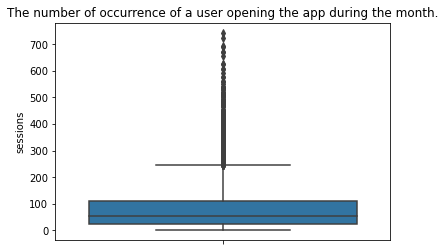

In [259]:
# Box plot of the session variable.
session_box = sns.boxplot(y=df['sessions'])
session_box.set_title('The number of occurrence of a user opening the app during the month.')                  

Text(0.5, 1.0, 'Distribution of user sessions')

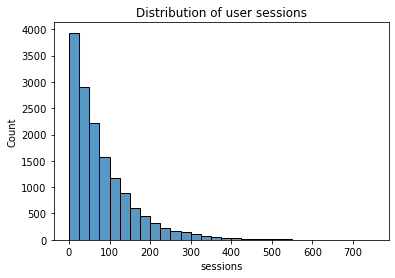

In [260]:
# Histogram of the user session variable
session_hist = sns.histplot(df['sessions'], binrange=(0,750),binwidth =25)
session_hist.set_title('Distribution of user sessions')


The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

Text(0.5, 1.0, 'Boxplot of the occurrence of driving at least 1 km during the month')

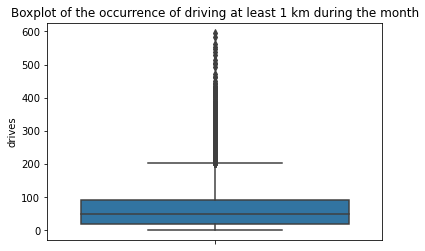

In [261]:
# Box plot of the drives variable
drives_box = sns.boxplot(y=df['drives'])
drives_box.set_title('Boxplot of the occurrence of driving at least 1 km during the month')


Text(0.5, 1.0, 'Distribution of the occurrence of driving at least 1 km during the month ')

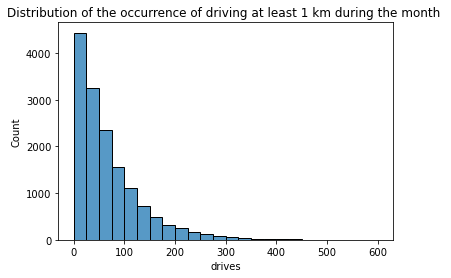

In [262]:
# Histogram of the drives variable
drives_hist = sns.histplot(df['drives'], binrange=(0,600), binwidth = 25)
drives_hist.set_title('Distribution of the occurrence of driving at least 1 km during the month ')


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

Text(0.5, 1.0, 'The boxplot of the total number of sessions since a user has onboarded')

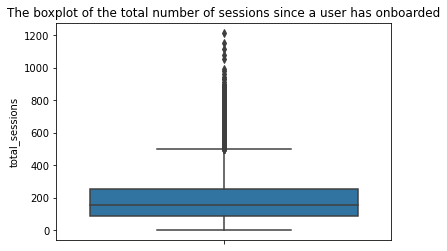

In [263]:
# Box plot of the total_sessions variable
totsession_box = sns.boxplot(y=df['total_sessions'])
totsession_box.set_title('The boxplot of the total number of sessions since a user has onboarded')


Text(0.5, 1.0, 'The distribution of the total number of sessions since a user has onboarded')

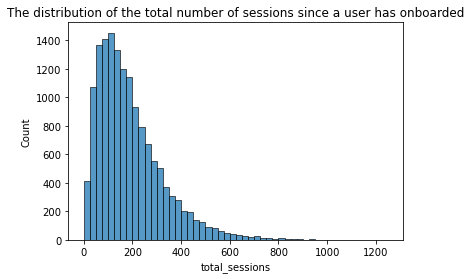

In [264]:
# Histogram of the total_sessions variable
totsession_hist = sns.histplot(df['total_sessions'], binrange =(0,1250), binwidth =25)
totsession_hist.set_title('The distribution of the total number of sessions since a user has onboarded')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something we can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

Text(0.5, 1.0, 'Boxplot of number of days since a user signed up for the app')

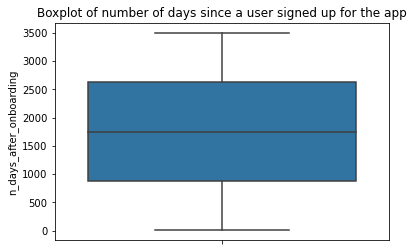

In [265]:
# Box plot of the n_days_after_onboarding variable
ndays_box = sns.boxplot(y=df['n_days_after_onboarding'])
ndays_box.set_title('Boxplot of number of days since a user signed up for the app')

Text(0.5, 1.0, 'Distribution of number of days since a user signed up for the app')

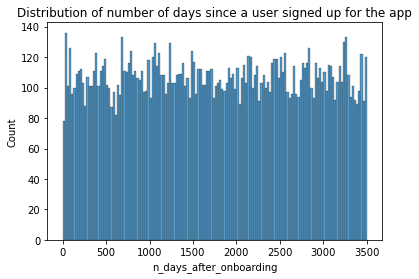

In [266]:
# Histogram of n_days_after_onboarding variable
ndays_hist = sns.histplot(df['n_days_after_onboarding'], binrange=(0,3500), binwidth =25)
ndays_hist.set_title('Distribution of number of days since a user signed up for the app')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

Text(0.5, 1.0, 'Boxplot of total kilometers driven during the month')

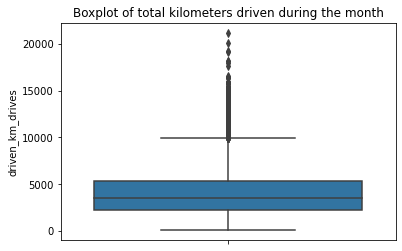

In [267]:
# Box plot of the driven_km_drives variable
drivekm_box = sns.boxplot(y=df['driven_km_drives'])
drivekm_box.set_title('Boxplot of total kilometers driven during the month')

Text(0.5, 1.0, 'Distribution of total kilometers driven during the month')

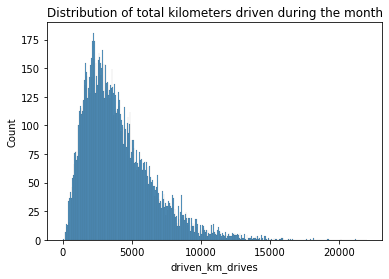

In [268]:
# Histogram of the driven_km_drives variable
drivekm_hist = sns.histplot(df['driven_km_drives'], binrange=(0,22000), binwidth =50)
drivekm_hist.set_title('Distribution of total kilometers driven during the month')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As we discovered in the analysis from the previous analysis, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

Text(0.5, 1.0, 'Boxplot of total duration driven in minutes during the month')

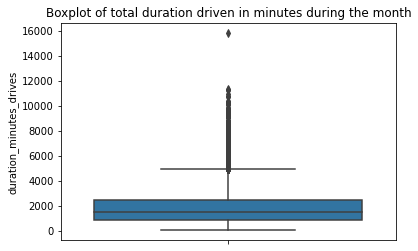

In [269]:
# Box plot of duration_minutes_drives variable
durmin_box = sns.boxplot(y=df['duration_minutes_drives'])
durmin_box.set_title('Boxplot of total duration driven in minutes during the month')

Text(0.5, 1.0, 'Distribution of total duration driven in minutes during the month')

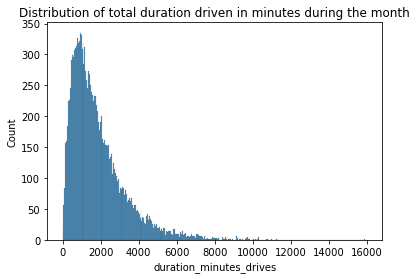

In [270]:
# Histogram of duration_minutes_drives variable
durmin_hist = sns.histplot(df['duration_minutes_drives'], binrange=(0,16000), binwidth =50)
durmin_hist.set_title('Distribution of total duration driven in minutes during the month')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

Text(0.5, 1.0, 'Boxplot of number of days the user opens the app during the month')

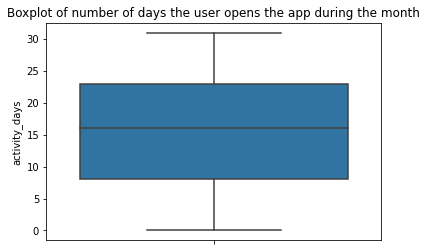

In [271]:
# Box plot of activity days
activedays_box = sns.boxplot(y=df['activity_days'])
activedays_box.set_title('Boxplot of number of days the user opens the app during the month')

Text(0.5, 1.0, 'Distribution of number of days the user opens the app during the month')

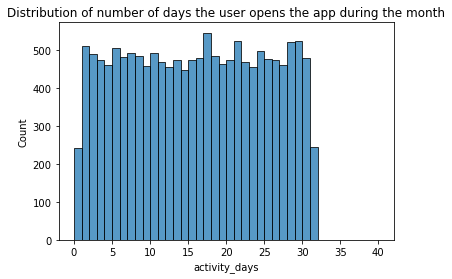

In [272]:
# Histogram of activity days
activedays_hist = sns.histplot(df['activity_days'], binrange=(0,40), binwidth =1)
activedays_hist.set_title('Distribution of number of days the user opens the app during the month')

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, but it might be thought as closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

Text(0.5, 1.0, 'Boxplot of number of days the user drives (at least 1 km) during the month')

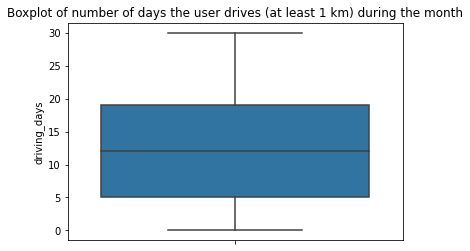

In [273]:
# Box plot
drivedays_box = sns.boxplot(y=df['driving_days'])
drivedays_box.set_title('Boxplot of number of days the user drives (at least 1 km) during the month')

Text(0.5, 1.0, 'Distribution of number of days the user drives (at least 1 km) during the month')

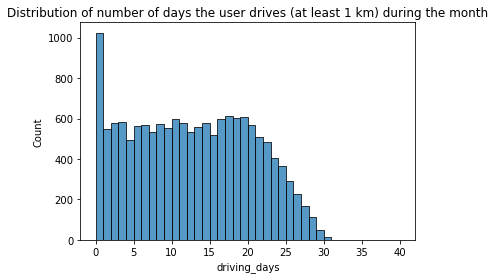

In [274]:
# Histogram
drivedays_hist = sns.histplot(df['driving_days'], binrange=(0,40), binwidth =1)
drivedays_hist.set_title('Distribution of number of days the user drives (at least 1 km) during the month')

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so let's use pie chart.

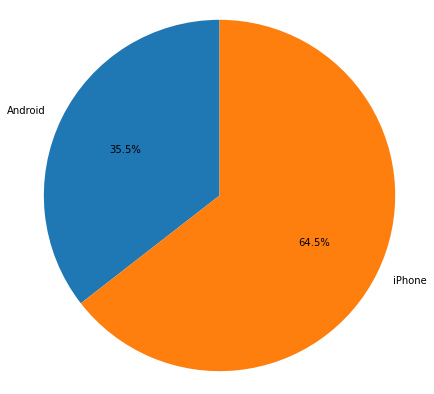

In [275]:
# Pie chart
device_total = df.groupby(by = 'device')['ID'].count()
plt.figure(figsize =(7,7))
plt.pie(device_total, labels=device_total.index, autopct = '%1.1f%%', startangle =90)
plt.axis('equal')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

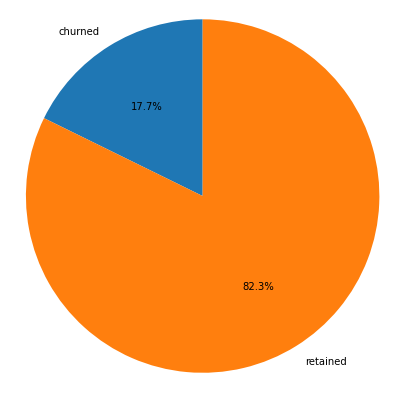

In [276]:
# Pie chart
label_count = df.groupby('label')['ID'].count()
plt.figure(figsize=(7,7))
plt.pie(label_count, labels=label_count.index, autopct = '%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

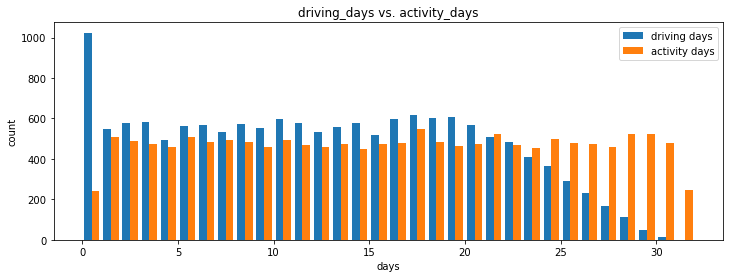

In [277]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [278]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

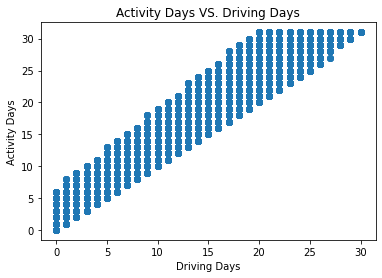

In [279]:
# Scatter plot
plt.scatter(x=df['driving_days'], y=df['activity_days'])
plt.title('Activity Days VS. Driving Days')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')
plt.show()

Notice that there is a theoretical limit. If we use the app to drive, then by definition it must count as a day-use as well. In other words, we cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a bar plot that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

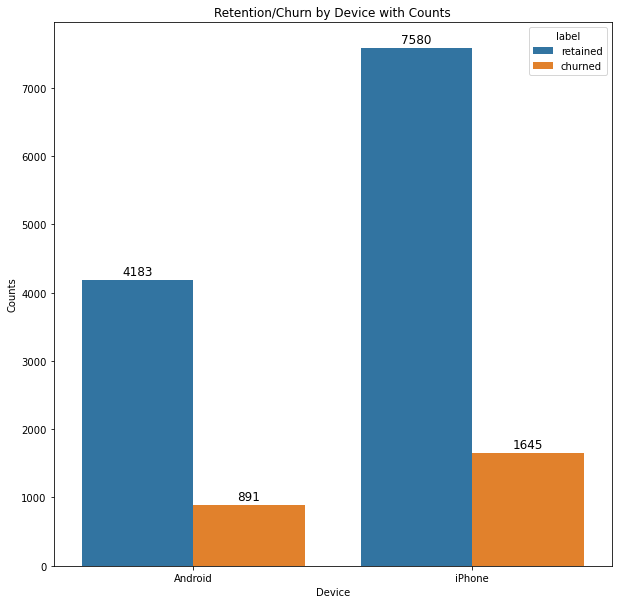

In [280]:
# Bar Plot
plt.figure(figsize = (10,10))
retention_hist = sns.countplot(x=df['device'], hue =df['label'])
for p in retention_hist.patches:
    retention_hist.annotate('{}'.format(p.get_height()), 
                           (p.get_x()+p.get_width()/2, p.get_height()),
                           ha ='center', va='baseline', fontsize =12, color ='black', xytext=(0,5),
                           textcoords = 'offset points')
plt.title('Retention/Churn by Device with Counts')
plt.ylabel('Counts')
plt.xlabel('Device')
plt.show()

In [281]:
df[df['device']=='Android']['label'].value_counts(normalize=True)

retained    0.824399
churned     0.175601
Name: label, dtype: float64

In [282]:
df[df['device']=='iPhone']['label'].value_counts(normalize=True)

retained    0.82168
churned     0.17832
Name: label, dtype: float64

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous analysis, we discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Let's examine this further.

In [283]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

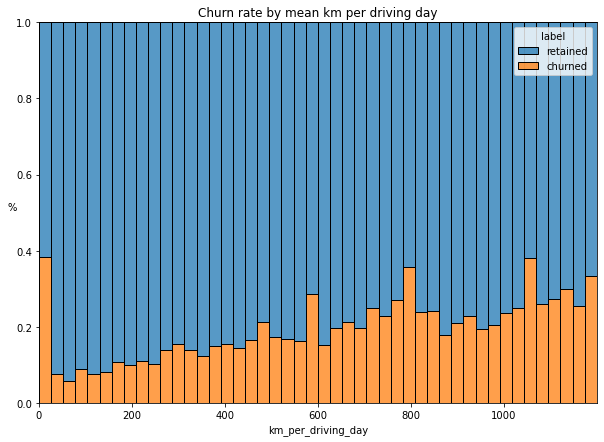

In [284]:
# Histogram
plt.figure(figsize=(10,7))
df_normal_drive = df[df['km_per_driving_day'] <=1200]
normal_hist = sns.histplot(x=df_normal_drive['km_per_driving_day'], hue = df_normal_drive['label'], multiple ='fill')

plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous preliminary analysis. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

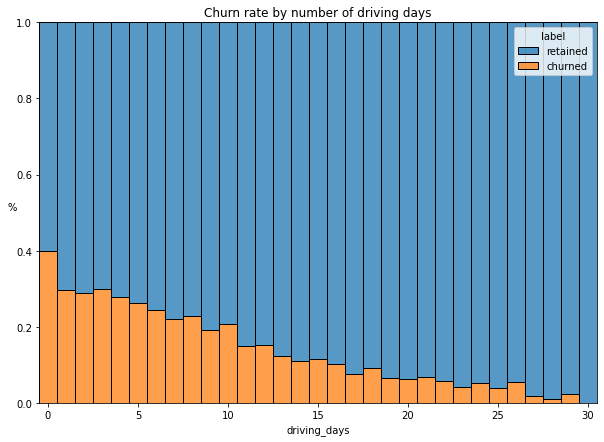

In [285]:
# Histogram
plt.figure(figsize=(10,7))
normal_hist = sns.histplot(x=df_normal_drive['driving_days'], hue = df_normal_drive['label'], multiple ='fill', discrete = True)

plt.ylabel('%', rotation=0)
plt.title('Churn rate by number of driving days');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [286]:
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

The median value of the new column is 0.42. However, it is noticable that there are some porportion bigger than 1. Let's explore the data a bit.

In [287]:
df[df['percent_sessions_in_last_month']>1]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
234,234,retained,56,46,55.922256,1918,25,9,5799.588600,905.885437,3,3,iPhone,1933.196200,1.001390
445,445,retained,104,83,103.615850,71,54,126,1916.893932,1074.151727,9,5,iPhone,383.378786,1.003707
640,640,retained,191,169,190.949418,1225,37,0,2227.386416,1267.155617,8,8,Android,278.423302,1.000265
1243,1243,churned,30,30,29.930036,250,322,0,6268.379191,3103.250292,3,0,Android,0.000000,1.002338
1850,1850,retained,65,53,64.858927,2330,343,11,60.441250,48.105926,22,20,iPhone,3.022063,1.002175
2326,2326,NaN,33,26,32.763093,2242,101,0,8831.348510,4937.932876,31,29,Android,304.529259,1.007231
2485,2485,retained,5,4,4.734686,1984,2,0,3308.241188,2344.118101,9,7,iPhone,472.605884,1.056036
3648,3648,churned,54,43,53.902115,1944,0,0,4167.912331,3100.046836,2,2,Android,2083.956166,1.001816
3804,3804,retained,1,1,0.653323,2192,493,15,2748.944382,1731.001106,27,20,iPhone,137.447219,1.530637
4263,4263,retained,136,109,135.864548,3388,164,0,2146.272861,914.706571,21,19,iPhone,112.961730,1.000997


It is noticable that the >1 porportion is because of the data type difference. Let's convert total session column into integer. 

In [288]:
#Convert total session value as integer first and recalculate the percentage column

df['total_session_converted'] = df['total_sessions'].round().astype(int)

df['percent_sessions_in_last_month'] = df['sessions']/df['total_session_converted']
df['percent_sessions_in_last_month'].describe()

count    14998.000000
mean         0.449247
std          0.286829
min          0.000000
25%          0.196517
50%          0.423077
75%          0.687500
max          1.000000
Name: percent_sessions_in_last_month, dtype: float64

Now, create a histogram depicting the distribution of values in this new column.

Text(0.5, 1.0, 'Distribution of percent session in last month breakdown by retained/churned')

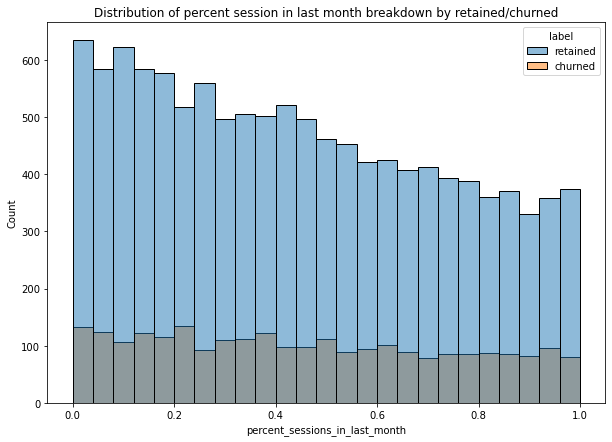

In [289]:
# Histogram
plt.figure(figsize=(10,7))
session_portion = sns.histplot(x=df['percent_sessions_in_last_month'], hue = df['label'], multiple = 'layer')

plt.title('Distribution of percent session in last month breakdown by retained/churned')

Check the median value of the `n_days_after_onboarding` variable.

In [290]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

Text(0.5, 1.0, 'Num. days after onboarding for users with >=40% sessions in last month')

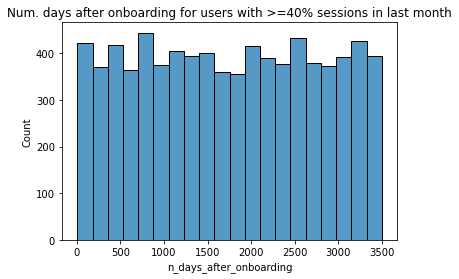

In [291]:
# Histogram of users who had more than 40% total sessions in the last month
df_select = df[df['percent_sessions_in_last_month'] >= 0.4]

df_select_hist = sns.histplot(x=df_select['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month')

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

#### **Drives per session ratio**

Create a new column `monthly_drives_per_session_ratio` that represents the average drives per session of each user

In [292]:
df['monthly_drives_per_session_ratio'] = df['drives']/df['sessions']
df['monthly_drives_per_session_ratio'].fillna(0, inplace=True)
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,total_session_converted,monthly_drives_per_session_ratio
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,0.449247,189.966731,0.854188
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,0.286829,136.401135,0.105841
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196517,91.000000,0.803922
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423077,160.000000,0.820513
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687500,254.000000,0.902439
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.000000,1216.000000,1.000000


Now, create a histogram depicting the distribution of values in this new column.

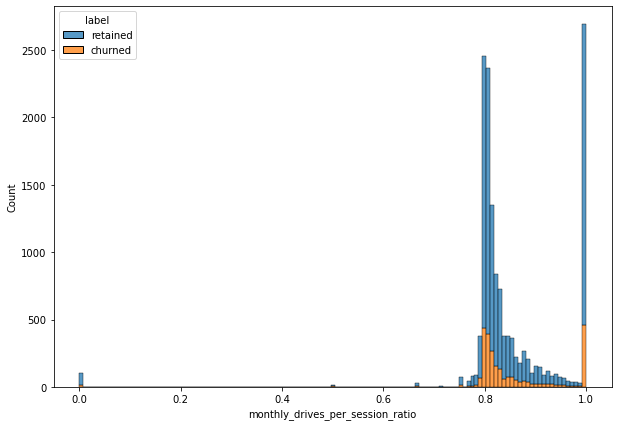

In [293]:
# Histogram
plt.figure(figsize = (10,7))
drive_session = sns.histplot(x=df['monthly_drives_per_session_ratio'], hue = df['label'], multiple = 'stack')

- The mean is 0.85 drives per session. it is reasonable that user might open the app but not drive. This situation might be explained as mistakenly open the app. 
- The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.

### **Step3. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Let's impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution. The threshold we choose based on the right skewed distribution is the value of 95 percentile.

In [294]:
# write a function to deal with outliers in the column
# replace outliers with 95 percentile value in the column 
# (Because data is right skewed so use 95 percentile to replace)

def rewrite_column(col, percentile):
    percentile95 = df[col].quantile(percentile)
    
    df.loc[df[col]>percentile95, col] = percentile95
    
    print('{:>25} | percentile : {} | threshold: {}'.format(col, percentile, percentile95))

Next, apply that function to the right skewed variables:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [295]:
for col in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
    rewrite_column(col, 0.95)

                 sessions | percentile : 0.95 | threshold: 243.0
                   drives | percentile : 0.95 | threshold: 201.0
           total_sessions | percentile : 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile : 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile : 0.95 | threshold: 4668.899348999999


In [296]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,total_session_converted,monthly_drives_per_session_ratio
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449247,189.966731,0.854188
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286829,136.401135,0.105841
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196517,91.000000,0.803922
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423077,160.000000,0.820513
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687500,254.000000,0.902439
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.000000,1216.000000,1.000000


#### **Conclusion**

- Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

- It's worth asking the Waze data team why so many users used the app so much in just the last month. Even for users whose sessions in last month is more than 40% of their total session, their user age is uniform distributed. 

- EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

- Valuable variables for future machine learning model: **Distance driven per driving day** had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, **number of driving days** had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

